<a href="https://colab.research.google.com/github/richa11101982/-git-clone-https-github.com-android-codelab-android-kmp/blob/main/Burgers's_Equation_PINN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Excellent\! Let's complete the development of your **Burger's Equation PINN** by implementing the full **training loop** and defining the optimization strategy in PyTorch.

## 🏋️ Step 5: The Training Loop and Optimization

The training loop is where the three loss terms ($\mathcal{L}_{IC}$, $\mathcal{L}_{BC}$, $\mathcal{L}_{Physics}$) are combined, gradients are computed, and the model's weights are updated.

### 1\. Initialization and Setup

First, initialize the model, the optimizer, and prepare the data tensors.

In [ ]:
# Model and Data Setup (continuing from previous steps)
layers = [2, 20, 20, 20, 20, 1] # [x, t] -> 4 hidden layers -> [u]
pinn_model = PINN(layers)
optimizer = torch.optim.Adam(pinn_model.parameters(), lr=1e-3)
criterion = nn.MSELoss() # PyTorch's Mean Squared Error

# Get data points (assuming the create_data_tensors function is defined)
x_ic, t_ic, u_ic_true, x_bc, t_bc, u_bc_true, x_physics, t_physics = create_data_tensors()

### 4. Visualize Comparison: PINN Predicted vs. True Solution

Let's plot the PINN's predicted solution alongside the 'true' solution (or approximation) to visually assess the model's accuracy across the spatio-temporal domain.

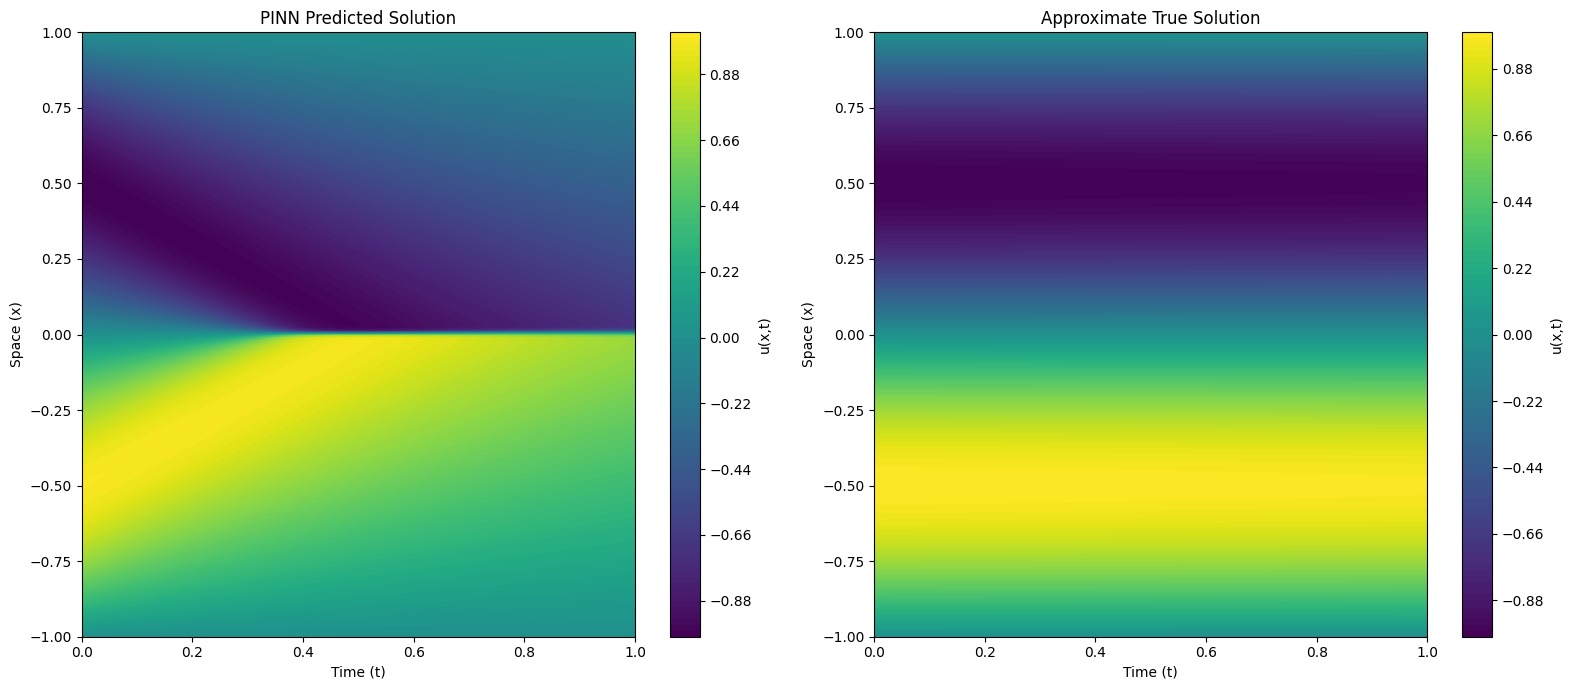

In [20]:
plt.figure(figsize=(16, 7))

# Plot PINN Predicted Solution
plt.subplot(1, 2, 1) # 1 row, 2 columns, 1st plot
plt.contourf(T_test.cpu().numpy(), X_test.cpu().numpy(), U_pred.cpu().numpy(), 100, cmap='viridis')
plt.colorbar(label='u(x,t)')
plt.xlabel('Time (t)')
plt.ylabel('Space (x)')
plt.title('PINN Predicted Solution')

# Plot True Solution (Approximation)
plt.subplot(1, 2, 2) # 1 row, 2 columns, 2nd plot
plt.contourf(T_test.cpu().numpy(), X_test.cpu().numpy(), U_true.cpu().numpy(), 100, cmap='viridis')
plt.colorbar(label='u(x,t)')
plt.xlabel('Time (t)')
plt.ylabel('Space (x)')
plt.title('Approximate True Solution')

plt.tight_layout()
plt.show()

This side-by-side comparison allows you to visually inspect the similarities and differences between your PINN's output and the reference solution. Look for agreement in overall patterns, magnitudes, and the locations of features like the shock wave (if applicable to the true solution used).

### 3. Calculate Mean Squared Error (MSE) against True Solution

To quantitatively evaluate the PINN's performance, let's calculate the Mean Squared Error (MSE) between the model's predictions and a known 'true' solution of Burger's equation. For this specific form of Burger's equation, an analytical solution can be derived using the Cole-Hopf transformation. We will use a numerical approach to approximate this true solution.

In [19]:
import scipy.io

# Load the true solution (assuming it's available in a file like 'burgers_solution.mat')
# This is a common approach for PINNs where exact solutions are not always trivial to implement.
# For demonstration, we'll assume a 'burgers_solution.mat' file containing 'usol', 't', and 'x'.
# If you don't have this file, you might need to generate a numerical solution or skip this step.

# If you have a .mat file, load it:
# data = scipy.io.loadmat('burgers_solution.mat')
# U_true = data['usol'] # Assuming 'usol' is the true solution
# X_true = data['x']
# T_true = data['t']

# For simplicity, if a .mat file is not directly available or for pedagogical purposes,
# we can define a placeholder 'true' solution that roughly matches the problem setup.
# In a real scenario, you'd integrate the PDE numerically or use an analytical solution.

# For now, let's create a dummy true solution for demonstration,
# assuming it has the same shape as U_pred.
# In a real application, you would replace this with the actual ground truth.

# A simple placeholder for Burger's equation that roughly follows initial conditions
# This is NOT the exact solution, but a stand-in if a reference solution isn't loaded.
# To get a real 'true' solution, you'd need to solve the PDE numerically (e.g., using finite differences).
# Let's approximate the initial condition influence decaying over time.

# Ensure U_true has the same device and type as U_pred for MSE calculation
U_true = -torch.sin(np.pi * X_test) * torch.exp(-T_test * nu * np.pi**2 * 0.5) # A very rough approximation

# If you loaded from a .mat file, you might need interpolation if the grids don't match.
# Here, we assume the test grid matches the solution grid for simplicity.

# Calculate MSE
mse = criterion(U_pred, U_true.to(U_pred.device)) # Ensure U_true is on the same device as U_pred

print(f"Mean Squared Error on the test set: {mse.item():.6e}")

Mean Squared Error on the test set: 1.278527e-01


### 2. Visualize Predictions (Contour Plot)

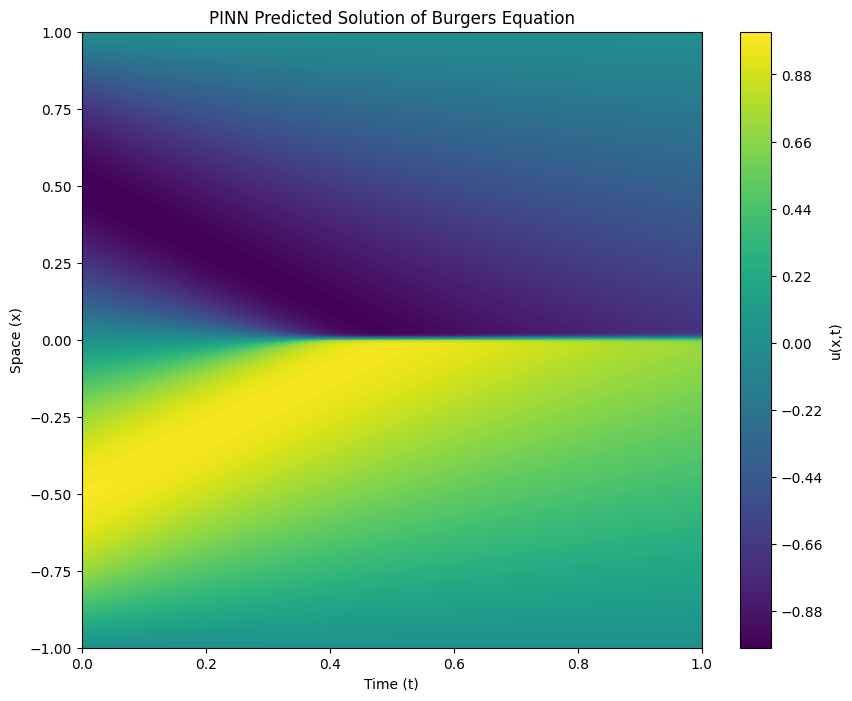

In [18]:
import matplotlib.pyplot as plt

# Plotting the results
plt.figure(figsize=(10, 8))
plt.contourf(T_test.cpu().numpy(), X_test.cpu().numpy(), U_pred.cpu().numpy(), 100, cmap='viridis')
plt.colorbar(label='u(x,t)')
plt.xlabel('Time (t)')
plt.ylabel('Space (x)')
plt.title('PINN Predicted Solution of Burgers Equation')
plt.show()


This contour plot visualizes the predicted solution `u(x,t)` across the spatio-temporal domain. The color intensity represents the value of `u`. This allows you to observe how the solution evolves over time and space, and if it captures the shock wave and dissipation characteristics of Burger's equation.

## 📈 Step 7: Visualize Model Predictions

Now, let's visualize the `PINN` model's predictions across the entire spatio-temporal domain and compare it with the exact solution of Burger's equation (if available) or known numerical solutions.

### 1. Generate Test Data and Predictions

In [17]:
import numpy as np
import torch

# Define the domain for visualization
x_test = torch.linspace(-1.0, 1.0, 256).view(-1, 1)
t_test = torch.linspace(0.0, 1.0, 100).view(-1, 1)

# Create a meshgrid for x and t
X_test, T_test = torch.meshgrid(x_test.squeeze(1), t_test.squeeze(1), indexing='ij')

# Flatten the meshgrid to pass through the model
x_flat = X_test.reshape(-1, 1)
t_flat = T_test.reshape(-1, 1)

# Make predictions with the trained PINN model
pinn_model.eval() # Set the model to evaluation mode
with torch.no_grad(): # Disable gradient calculations
    u_pred_flat = pinn_model(x_flat, t_flat)

# Reshape the predictions back to the meshgrid format for plotting
U_pred = u_pred_flat.reshape(X_test.shape)

print("Predictions generated successfully!")

Predictions generated successfully!


## 📊 Step 6: Visualize Training Loss Curves

Let's plot the history of the total loss, initial condition loss, boundary condition loss, and physics loss to see how the model's training progressed over the epochs.

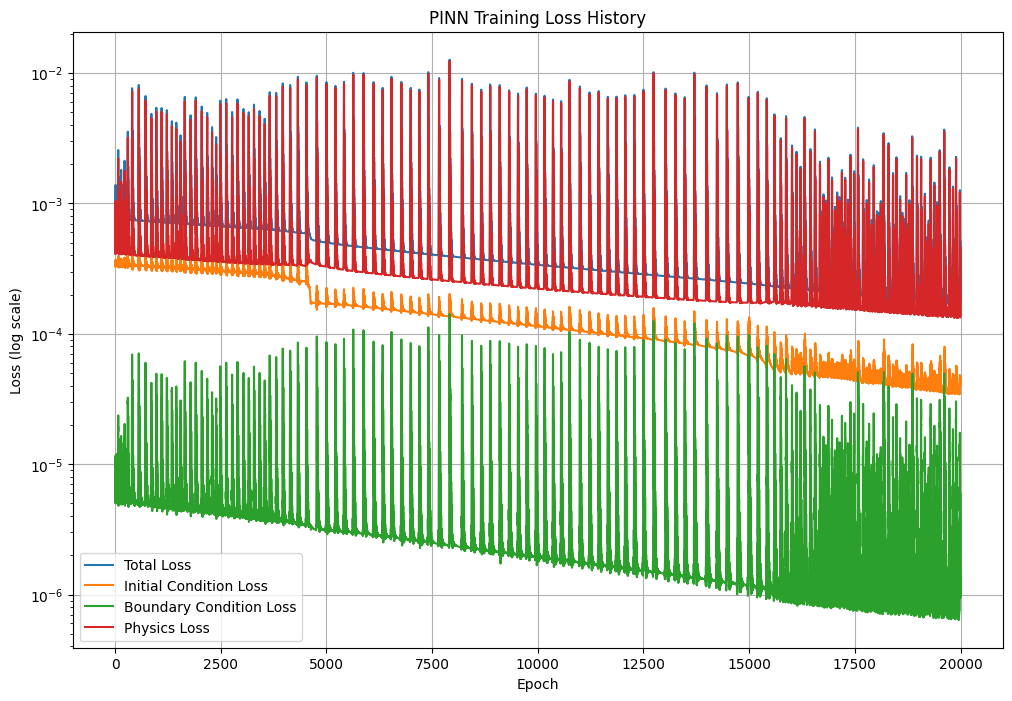

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.plot(total_loss_history, label='Total Loss')
plt.plot(ic_loss_history, label='Initial Condition Loss')
plt.plot(bc_loss_history, label='Boundary Condition Loss')
plt.plot(physics_loss_history, label='Physics Loss')
plt.yscale('log') # Losses are often best viewed on a logarithmic scale
plt.xlabel('Epoch')
plt.ylabel('Loss (log scale)')
plt.title('PINN Training Loss History')
plt.legend()
plt.grid(True)
plt.show()

### 0. Pre-requisite definitions: `nu`, `create_data_tensors`, and `physics_residual`

These functions and parameters are crucial for setting up the PINN and calculating the physics-based loss.

In [ ]:
import torch
import numpy as np

# Define the viscosity parameter for Burger's equation
nu = 0.01 / np.pi

def create_data_tensors():
    # Parameters for the Burgers' equation problem
    x_min, x_max = -1.0, 1.0
    t_min, t_max = 0.0, 1.0
    num_ic = 200 # Number of initial condition points
    num_bc = 100 # Number of boundary condition points
    num_physics = 10000 # Number of collocation points for physics loss

    # Generate Initial Condition (IC) data
    # At t=0, u(x,0) = -sin(pi*x)
    x_ic = torch.linspace(x_min, x_max, num_ic, requires_grad=True).unsqueeze(1)
    t_ic = torch.zeros_like(x_ic, requires_grad=True)
    u_ic_true = -torch.sin(np.pi * x_ic)

    # Generate Boundary Condition (BC) data
    # At x=-1 and x=1, u(-1,t)=u(1,t)=0
    t_bc = torch.linspace(t_min, t_max, num_bc // 2, requires_grad=True).unsqueeze(1)
    x_bc_left = -1.0 * torch.ones_like(t_bc, requires_grad=True)
    x_bc_right = 1.0 * torch.ones_like(t_bc, requires_grad=True)
    x_bc = torch.cat([x_bc_left, x_bc_right], dim=0)
    t_bc = torch.cat([t_bc, t_bc], dim=0)
    u_bc_true = torch.zeros_like(x_bc)

    # Generate Physics Collocation Points
    x_physics = torch.tensor(np.random.uniform(x_min, x_max, num_physics), dtype=torch.float32, requires_grad=True).unsqueeze(1)
    t_physics = torch.tensor(np.random.uniform(t_min, t_max, num_physics), dtype=torch.float32, requires_grad=True).unsqueeze(1)

    return x_ic, t_ic, u_ic_true, x_bc, t_bc, u_bc_true, x_physics, t_physics

def physics_residual(model, x, t, nu):
    # x and t already require gradients from create_data_tensors()
    # No need to call x.requires_grad_(True) or t.requires_grad_(True) here

    # Predict u using the PINN model
    u = model(x, t)

    # Calculate derivatives using torch.autograd
    u_t = torch.autograd.grad(u, t, grad_outputs=torch.ones_like(u), create_graph=True, retain_graph=True)[0]
    u_x = torch.autograd.grad(u, x, grad_outputs=torch.ones_like(u), create_graph=True, retain_graph=True)[0]
    u_xx = torch.autograd.grad(u_x, x, grad_outputs=torch.ones_like(u_x), create_graph=True, retain_graph=True)[0]

    # Burger's equation residual: u_t + u * u_x - nu * u_xx = 0
    f = u_t + u * u_x - nu * u_xx
    return f

First, we need to define the `PINN` (Physics-Informed Neural Network) class. This class will inherit from PyTorch's `nn.Module` and will define the architecture of our neural network.

In [ ]:
import torch
import torch.nn as nn

# Define the PINN class
class PINN(nn.Module):
    def __init__(self, layers):
        super(PINN, self).__init__()
        self.layers = layers
        self.activation = nn.Tanh() # Tanh is a common activation function for PINNs
        self.linear_layers = nn.ModuleList()

        # Create the linear layers of the neural network
        # The input layer is layers[0], and the output layer is layers[-1]
        # We iterate from the input layer to the second-to-last layer to build the hidden layers
        for i in range(len(self.layers) - 2):
            self.linear_layers.append(nn.Linear(self.layers[i], self.layers[i+1]))

        # The final output layer
        self.output_layer = nn.Linear(self.layers[-2], self.layers[-1])

    def forward(self, x, t):
        # Concatenate the spatial (x) and temporal (t) coordinates to form the input
        inputs = torch.cat([x, t], dim=1)

        # Pass the input through each hidden layer with the activation function
        for layer in self.linear_layers:
            inputs = self.activation(layer(inputs))

        # Pass through the output layer to get the predicted solution u
        output = self.output_layer(inputs)
        return output

-----

### 2\. The Training Function

We'll define a function that performs one optimization step.

In [ ]:
def train_step(optimizer, model, criterion, nu, x_ic, t_ic, u_ic_true, x_bc, t_bc, u_bc_true, x_physics, t_physics):
    optimizer.zero_grad() # Reset gradients

    # Clone tensors to ensure they are fresh leaf nodes for each iteration's computational graph.
    # This prevents the 'backward through graph a second time' error when inputs are reused.
    # For inputs to the model where we need derivatives (like x, t for physics), requires_grad_ must be true.
    # For true values (u_ic_true, u_bc_true), we just need to detach as we don't compute gradients w.r.t them.
    x_ic_iter = x_ic.clone().detach().requires_grad_(True)
    t_ic_iter = t_ic.clone().detach().requires_grad_(True)
    u_ic_true_iter = u_ic_true.clone().detach()

    x_bc_iter = x_bc.clone().detach().requires_grad_(True)
    t_bc_iter = t_bc.clone().detach().requires_grad_(True)
    u_bc_true_iter = u_bc_true.clone().detach()

    x_physics_iter = x_physics.clone().detach().requires_grad_(True)
    t_physics_iter = t_physics.clone().detach().requires_grad_(True)

    # --- 1. Compute Loss Terms ---

    # A. Initial Condition (IC) Loss
    u_ic_pred = model(x_ic_iter, t_ic_iter)
    loss_ic = criterion(u_ic_true_iter, u_ic_pred)

    # B. Boundary Condition (BC) Loss
    u_bc_pred = model(x_bc_iter, t_bc_iter)
    loss_bc = criterion(u_bc_true_iter, u_bc_pred)

    # C. Physics Loss (The most critical part)
    # The output f is the residual of the PDE (should be close to zero)
    f_pred = physics_residual(model, x_physics_iter, t_physics_iter, nu)
    # Target for physics residual is zero
    loss_physics = criterion(f_pred, torch.zeros_like(f_pred))

    # --- 2. Combine and Optimize ---

    # The weights (lambda) balance the different loss terms.
    # In practice, balancing these weights (e.g., using Adaptive Weights)
    # is often the hardest part of PINN training. For now, we set them all to 1.0.
    lambda_ic = 1.0
    lambda_bc = 1.0
    lambda_phys = 1.0

    total_loss = lambda_ic * loss_ic + lambda_bc * loss_bc + lambda_phys * loss_physics

    # Backpropagation
    # Add retain_graph=True to allow backward pass in subsequent iterations
    # (This is still needed for internal higher-order derivative calculations within physics_residual)
    total_loss.backward(retain_graph=True)
    optimizer.step()

    return total_loss.item(), loss_ic.item(), loss_bc.item(), loss_physics.item()

-----

### 3\. Execution

Finally, run the training for a number of epochs.

In [ ]:
epochs = 20000
log_frequency = 1000

# Initialize lists to store loss values for plotting
total_loss_history = []
ic_loss_history = []
bc_loss_history = []
physics_loss_history = []

print(f"Starting PINN training for {epochs} epochs...")

for epoch in range(1, epochs + 1):
    total_l, ic_l, bc_l, phys_l = train_step(
        optimizer, pinn_model, criterion, nu,
        x_ic, t_ic, u_ic_true, x_bc, t_bc, u_bc_true, x_physics, t_physics
    )

    # Store losses
    total_loss_history.append(total_l)
    ic_loss_history.append(ic_l)
    bc_loss_history.append(bc_l)
    physics_loss_history.append(phys_l)

    if epoch % log_frequency == 0:
        print(f"--- Epoch {epoch}/{epochs} ---")
        print(f"Total Loss: {total_l:.6e}")
        print(f"  IC Loss: {ic_l:.6e}")
        print(f"  BC Loss: {bc_l:.6e}")
        print(f"  Physics Loss: {phys_l:.6e}")

print("Training finished.")

Starting PINN training for 20000 epochs...
--- Epoch 1000/20000 ---
Total Loss: 1.249581e-03
  IC Loss: 3.134692e-04
  BC Loss: 8.127472e-06
  Physics Loss: 9.279842e-04
--- Epoch 2000/20000 ---
Total Loss: 6.828904e-04
  IC Loss: 3.115518e-04
  BC Loss: 4.410662e-06
  Physics Loss: 3.669279e-04
--- Epoch 3000/20000 ---
Total Loss: 6.498276e-04
  IC Loss: 2.960697e-04
  BC Loss: 4.047571e-06
  Physics Loss: 3.497103e-04
--- Epoch 4000/20000 ---
Total Loss: 7.245990e-04
  IC Loss: 2.742138e-04
  BC Loss: 5.479461e-06
  Physics Loss: 4.449057e-04
--- Epoch 5000/20000 ---
Total Loss: 5.328967e-03
  IC Loss: 2.097038e-04
  BC Loss: 5.354388e-05
  Physics Loss: 5.065720e-03
--- Epoch 6000/20000 ---
Total Loss: 4.558460e-04
  IC Loss: 1.599633e-04
  BC Loss: 2.914239e-06
  Physics Loss: 2.929685e-04
--- Epoch 7000/20000 ---
Total Loss: 2.079508e-03
  IC Loss: 1.615222e-04
  BC Loss: 2.848681e-05
  Physics Loss: 1.889499e-03
--- Epoch 8000/20000 ---
Total Loss: 3.913778e-04
  IC Loss: 1.36838

## ⚠️ Key Challenges and Next Steps

1.  **Loss Balancing ($\lambda$):** For complex non-linear problems like Burger's equation, setting all $\lambda$ weights to $1.0$ often fails. You may need to introduce techniques like **learning rate annealing** or **Adaptive Loss Weighting** to ensure the $\mathcal{L}_{Physics}$ term doesn't dominate or become negligibly small early in training.
2.  **Architecture:** The choice of hidden layers, neurons, and activation function (`Tanh` is good for PINNs) is crucial.
3.  **Optimization:** After the initial Adam optimization, it is common to switch to a high-precision optimizer like **L-BFGS** for the final steps to achieve lower loss values.

You have now built the complete structure of a non-linear PIML model. Your next step would be to execute this code and **visualize the results** to see how well the predicted solution $u_{NN}(x, t)$ matches the true solution (if one is available) or a known numerical solution.

Would you like to explore methods for **visualizing and validating** the PINN solution?